In [4]:
!pip install imbalanced-learn

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from imblearn.over_sampling import SMOTE


In [6]:
# Load the dataset
df = pd.read_csv("/content/kidney_disease_dataset.csv")

# Display the first 5 rows to get a sense of the data
df.head()


,Age of the patient,Blood pressure (mm/Hg),Specific gravity of urine,Albumin in urine,Sugar in urine,Red blood cells in urine,Pus cells in urine,Pus cell clumps in urine,Bacteria in urine,Random blood glucose level (mg/dl),...,Smoking status,Body Mass Index (BMI),Physical activity level,Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,Urinary sediment microscopy results,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level,Target
0,54,167,1.023,1,4,normal,abnormal,not present,not present,96,...,yes,25.3,low,4,16,0.67,normal,4.88,10.23,No_Disease
1,42,127,1.023,3,2,normal,normal,not present,present,73,...,no,20.6,moderate,3,13,0.55,abnormal,4.49,13.11,Low_Risk
2,38,148,1.016,0,0,abnormal,normal,not present,not present,77,...,no,38.4,high,11,23,2.37,abnormal,4.57,13.27,No_Disease
3,7,98,1.017,4,0,abnormal,normal,not present,present,225,...,no,24.7,high,24,3,2.54,abnormal,8.57,12.36,No_Disease
4,67,174,1.015,1,1,normal,abnormal,not present,not present,376,...,yes,17.6,high,22,24,1.90,normal,6.75,1.46,No_Disease


In [7]:
basic_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20538 entries, 0 to 20537
Data columns (total 43 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Age of the patient                           20538 non-null  int64  
 1   Blood pressure (mm/Hg)                       20538 non-null  int64  
 2   Specific gravity of urine                    20538 non-null  float64
 3   Albumin in urine                             20538 non-null  int64  
 4   Sugar in urine                               20538 non-null  int64  
 5   Red blood cells in urine                     20538 non-null  object 
 6   Pus cells in urine                           20538 non-null  object 
 7   Pus cell clumps in urine                     20538 non-null  object 
 8   Bacteria in urine                            20538 non-null  object 
 9   Random blood glucose level (mg/dl)           20538 non-null  int64  
 10

In [8]:
# Get summary statistics
df.describe(include='all')

,Age of the patient,Blood pressure (mm/Hg),Specific gravity of urine,Albumin in urine,Sugar in urine,Red blood cells in urine,Pus cells in urine,Pus cell clumps in urine,Bacteria in urine,Random blood glucose level (mg/dl),...,Smoking status,Body Mass Index (BMI),Physical activity level,Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,Urinary sediment microscopy results,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level,Target
count,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538,20538,20538,20538,20538.000000,...,20538,20538.000000,20538,20538.000000,20538.000000,20538.000000,20538,20538.000000,20538.000000,20538
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,NaN,...,2,NaN,3,NaN,NaN,NaN,2,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,normal,abnormal,present,not present,NaN,...,no,NaN,low,NaN,NaN,NaN,abnormal,NaN,NaN,No_Disease
freq,NaN,NaN,NaN,NaN,NaN,10272,10274,10298,10353,NaN,...,10293,NaN,6869,NaN,NaN,NaN,10302,NaN,NaN,16432
mean,47.477895,130.352079,1.015041,2.501266,2.494595,NaN,NaN,NaN,NaN,284.630295,...,NaN,27.544240,NaN,14.918152,14.946879,1.749459,NaN,5.061633,7.702504,NaN
std,24.941947,29.063838,0.005793,1.697084,1.701059,NaN,NaN,NaN,NaN,124.633265,...,NaN,7.221082,NaN,8.963722,8.945500,0.718980,NaN,2.853217,4.191765,NaN
min,5.000000,80.000000,1.005000,0.000000,0.000000,NaN,NaN,NaN,NaN,70.000000,...,NaN,15.000000,NaN,0.000000,0.000000,0.500000,NaN,0.100000,0.500000,NaN
25%,26.000000,105.000000,1.010000,1.000000,1.000000,NaN,NaN,NaN,NaN,176.000000,...,NaN,21.300000,NaN,7.000000,7.000000,1.130000,NaN,2.600000,4.050000,NaN
50%,47.000000,131.000000,1.015000,3.000000,2.000000,NaN,NaN,NaN,NaN,284.500000,...,NaN,27.600000,NaN,15.000000,15.000000,1.750000,NaN,5.070000,7.710000,NaN
75%,69.000000,156.000000,1.020000,4.000000,4.000000,NaN,NaN,NaN,NaN,393.000000,...,NaN,33.800000,NaN,23.000000,23.000000,2.370000,NaN,7.537500,11.297500,NaN


In [9]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

,0
Age of the patient,0
Blood pressure (mm/Hg),0
Specific gravity of urine,0
Albumin in urine,0
Sugar in urine,0
Red blood cells in urine,0
Pus cells in urine,0
Pus cell clumps in urine,0
Bacteria in urine,0
Random blood glucose level (mg/dl),0


In [10]:
# prompt: generate label encoding for all non numeric columns and keep a dict of what label corresponds to what class in what col

# Dictionary to store label mappings
label_mappings = {}

# Iterate over columns
for col in df.columns:
    # Check if the column is of object (non-numeric) dtype
    if df[col].dtype == 'object':
        # Create a LabelEncoder instance
        le = LabelEncoder()
        # Fit and transform the column
        df[col] = le.fit_transform(df[col])
        # Store the mapping
        label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Display the first few rows with encoded values
df.head()

# Print the label mappings
print("Label Mappings:")
for col, mapping in label_mappings.items():
    print(f"{col}: {mapping}")


Label Mappings:
Red blood cells in urine: {'abnormal': np.int64(0), 'normal': np.int64(1)}
Pus cells in urine: {'abnormal': np.int64(0), 'normal': np.int64(1)}
Pus cell clumps in urine: {'not present': np.int64(0), 'present': np.int64(1)}
Bacteria in urine: {'not present': np.int64(0), 'present': np.int64(1)}
Hypertension (yes/no): {'no': np.int64(0), 'yes': np.int64(1)}
Diabetes mellitus (yes/no): {'no': np.int64(0), 'yes': np.int64(1)}
Coronary artery disease (yes/no): {'no': np.int64(0), 'yes': np.int64(1)}
Appetite (good/poor): {'good': np.int64(0), 'poor': np.int64(1)}
Pedal edema (yes/no): {'no': np.int64(0), 'yes': np.int64(1)}
Anemia (yes/no): {'no': np.int64(0), 'yes': np.int64(1)}
Family history of chronic kidney disease: {'no': np.int64(0), 'yes': np.int64(1)}
Smoking status: {'no': np.int64(0), 'yes': np.int64(1)}
Physical activity level: {'high': np.int64(0), 'low': np.int64(1), 'moderate': np.int64(2)}
Urinary sediment microscopy results: {'abnormal': np.int64(0), 'normal

<ipython-input-11-d9a97452fbfe>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=df['Target'], palette="Set2")


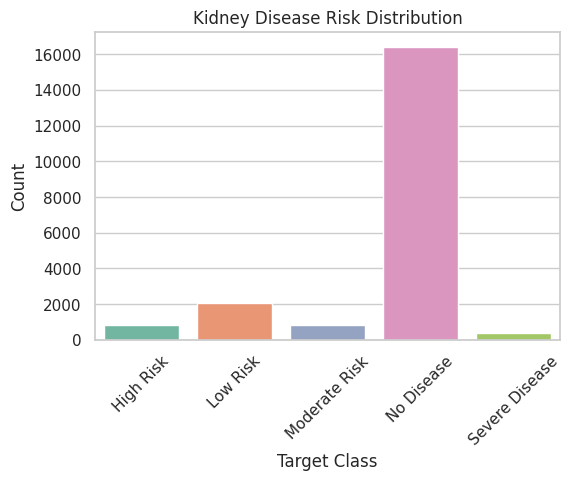

In [11]:
# Ensure seaborn style
sns.set(style="whitegrid")

# 1. Target Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x=df['Target'], palette="Set2")
plt.title("Kidney Disease Risk Distribution")
plt.xlabel("Target Class")
plt.ylabel("Count")
x_labels = ['High Risk', 'Low Risk', 'Moderate Risk', 'No Disease', 'Severe Disease']
plt.xticks(range(len(x_labels)), x_labels, rotation=45)
plt.show()

Correlations with the 'Target' column:
Target                                         1.000000
Pus cells in urine                             0.026725
Specific gravity of urine                      0.014126
Pedal edema (yes/no)                           0.012895
Age of the patient                             0.011191
Red blood cells in urine                       0.009634
Hypertension (yes/no)                          0.009548
Duration of diabetes mellitus (years)          0.008891
Parathyroid hormone (PTH) level                0.007211
Diabetes mellitus (yes/no)                     0.006088
Hemoglobin level (gms)                         0.005820
C-reactive protein (CRP) level                 0.004926
Random blood glucose level (mg/dl)             0.004437
Serum albumin level                            0.003526
Serum calcium level                            0.002980
Blood urea (mg/dl)                             0.002709
Coronary artery disease (yes/no)               0.001573
Body Mass

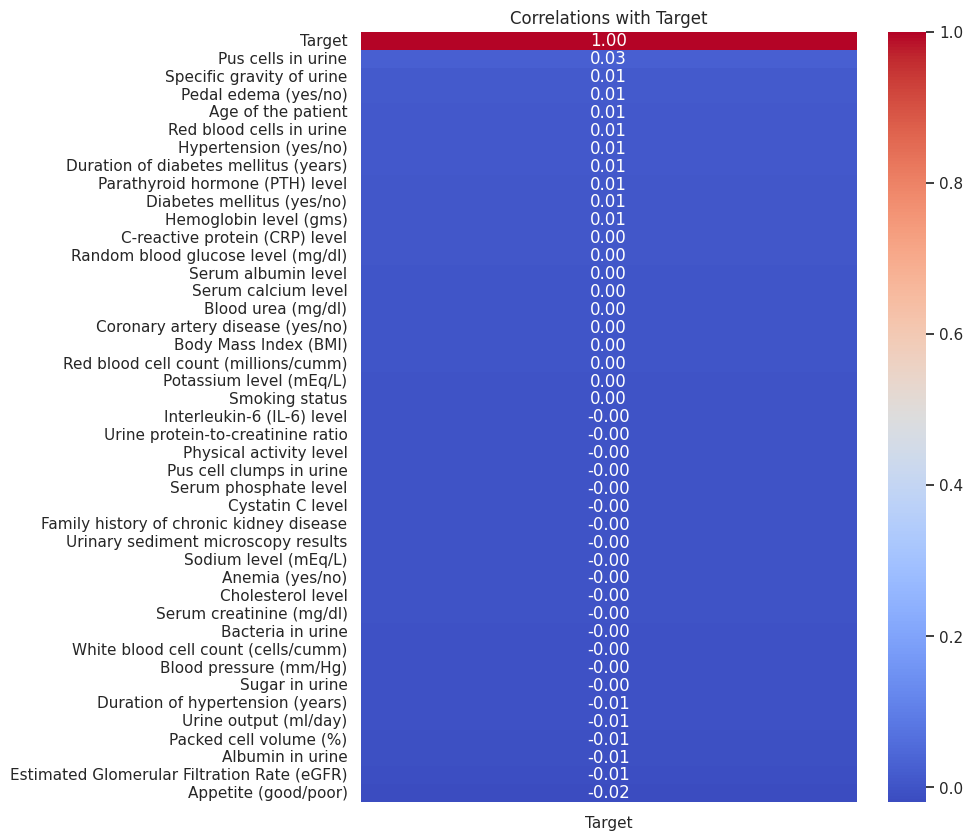

In [12]:
# prompt: give me the correlations between all columns and the Target column

# Calculate correlations with the 'Target' column
correlations = df.corr()['Target'].sort_values(ascending=False)

# Display the correlations
print("Correlations with the 'Target' column:")
print(correlations)

# Optional: Visualize the correlations using a heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(correlations.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlations with Target")
plt.show()

In [13]:
# prompt: i only need 2000 samples from class no.3 in the Target column and all samples from all other classes

# Assuming 'Target' is the column representing the classes
df_class_3 = df[df['Target'] == 3].sample(n=1000, random_state=42)
df_other_classes = df[df['Target'] != 3]
df_resampled = pd.concat([df_class_3, df_other_classes], ignore_index=True)

# Assuming 'Target' is the column representing the classes
df_class_1 = df_resampled[df_resampled['Target'] == 1].sample(n=1000, random_state=42)
df_other_classes_1 = df_resampled[df_resampled['Target'] != 1]
df_resampled_1 = pd.concat([df_class_1, df_other_classes_1], ignore_index=True)

# Shuffle the resulting DataFrame to mix the samples
df_resampled_1 = df_resampled_1.sample(frac=1, random_state=42).reset_index(drop=True)

print(df_resampled_1['Target'].value_counts())


Target
1    1000
3    1000
0     821
2     821
4     410
Name: count, dtype: int64


<ipython-input-14-7d66e0a6b884>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_resampled_1, x=df_resampled_1['Target'], palette="Set2")


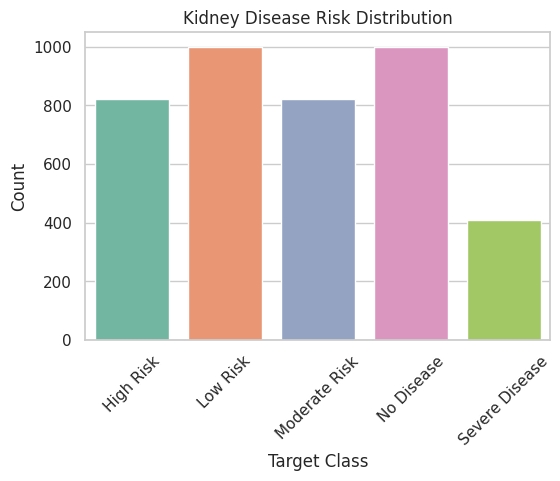

In [14]:
# Ensure seaborn style
sns.set(style="whitegrid")

# 1. Target Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df_resampled_1, x=df_resampled_1['Target'], palette="Set2")
plt.title("Kidney Disease Risk Distribution")
plt.xlabel("Target Class")
plt.ylabel("Count")
x_labels = ['High Risk', 'Low Risk', 'Moderate Risk', 'No Disease', 'Severe Disease']
plt.xticks(range(len(x_labels)), x_labels, rotation=45)
plt.show()

Correlations with the 'Target' column:
Target                                         1.000000
Pus cells in urine                             0.038924
Duration of diabetes mellitus (years)          0.032608
Coronary artery disease (yes/no)               0.025282
Random blood glucose level (mg/dl)             0.020483
Red blood cells in urine                       0.020291
Pedal edema (yes/no)                           0.020227
Specific gravity of urine                      0.016955
Serum calcium level                            0.013951
Parathyroid hormone (PTH) level                0.012147
Serum creatinine (mg/dl)                       0.011324
Hypertension (yes/no)                          0.010077
Blood urea (mg/dl)                             0.008371
C-reactive protein (CRP) level                 0.007810
Potassium level (mEq/L)                        0.006939
Body Mass Index (BMI)                          0.006523
Interleukin-6 (IL-6) level                     0.005933
Urinary s

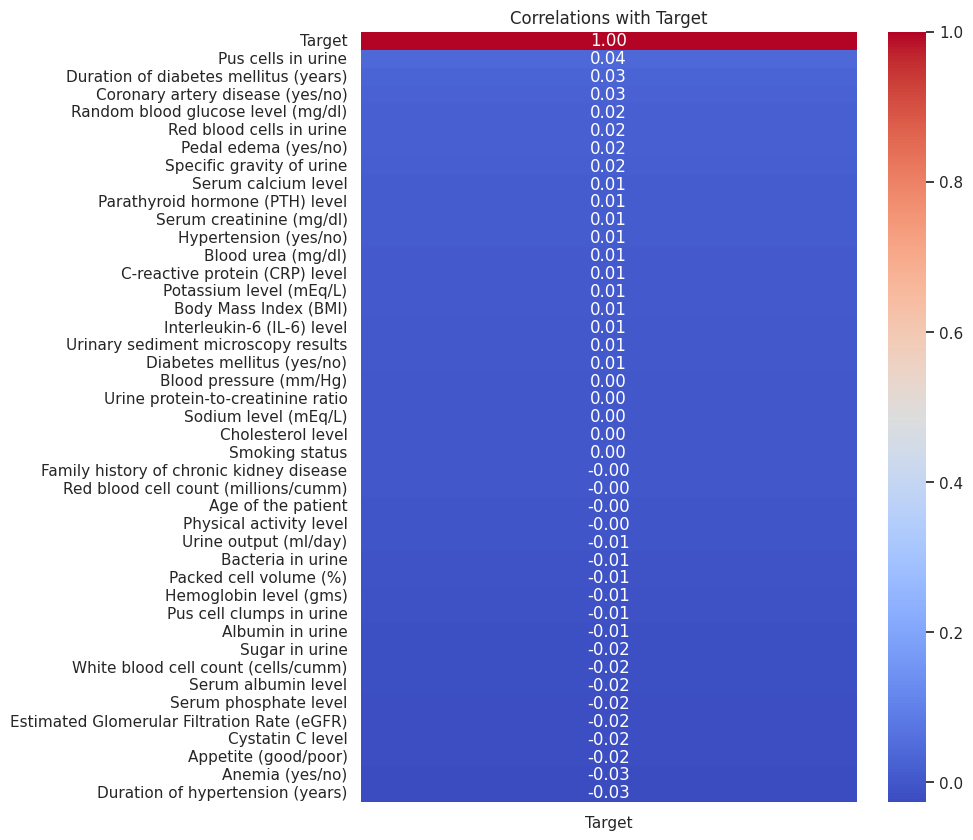

In [15]:
# prompt: give me the correlations between all columns and the Target column

# Calculate correlations with the 'Target' column
correlations = df_resampled_1.corr()['Target'].sort_values(ascending=False)

# Display the correlations
print("Correlations with the 'Target' column:")
print(correlations)

# Optional: Visualize the correlations using a heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(correlations.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlations with Target")
plt.show()

#SMOTE and Feature Engineering

In [16]:
# Apply SMOTE
X = df.drop(columns=['Target'])
y = df['Target']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Output
print("✅ SMOTE applied.")
print("🎯 Class counts:", y_resampled.value_counts())

✅ SMOTE applied.
🎯 Class counts: Target
3    16432
1    16432
2    16432
4    16432
0    16432
Name: count, dtype: int64


In [17]:
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['Target'] = y_resampled

In [18]:
# 🎯 Create new features in df_balanced (after SMOTE)
# Make sure df_balanced already exists and includes the original features

# 1. Blood pressure to age ratio
df_balanced['bp_to_age_ratio'] = df_balanced['Blood pressure (mm/Hg)'] / (df_balanced['Age of the patient'] + 1)

# 2. Total disease duration
df_balanced['total_disease_duration'] = (
    df_balanced['Duration of diabetes mellitus (years)'] +
    df_balanced['Duration of hypertension (years)']
)

# 3. Is elderly flag
df_balanced['is_elderly'] = (df_balanced['Age of the patient'] > 60).astype(int)

# ✅ Optional: check new columns
print(df_balanced[['bp_to_age_ratio', 'total_disease_duration', 'is_elderly']].head())


   bp_to_age_ratio  total_disease_duration  is_elderly
0         3.036364                      20           0
1         2.953488                      16           0
2         3.794872                      34           0
3        12.250000                      27           0
4         2.558824                      46           1


Correlations with the 'Target' column:
Target                                         1.000000
Pus cells in urine                             0.103494
Coronary artery disease (yes/no)               0.090134
Red blood cells in urine                       0.085726
Pedal edema (yes/no)                           0.079295
Hypertension (yes/no)                          0.078691
Family history of chronic kidney disease       0.077208
Physical activity level                        0.070788
Urinary sediment microscopy results            0.069646
Smoking status                                 0.063608
Bacteria in urine                              0.063277
Pus cell clumps in urine                       0.061399
Diabetes mellitus (yes/no)                     0.059798
Anemia (yes/no)                                0.041459
Parathyroid hormone (PTH) level                0.035208
Appetite (good/poor)                           0.023076
Albumin in urine                               0.019419
Serum cre

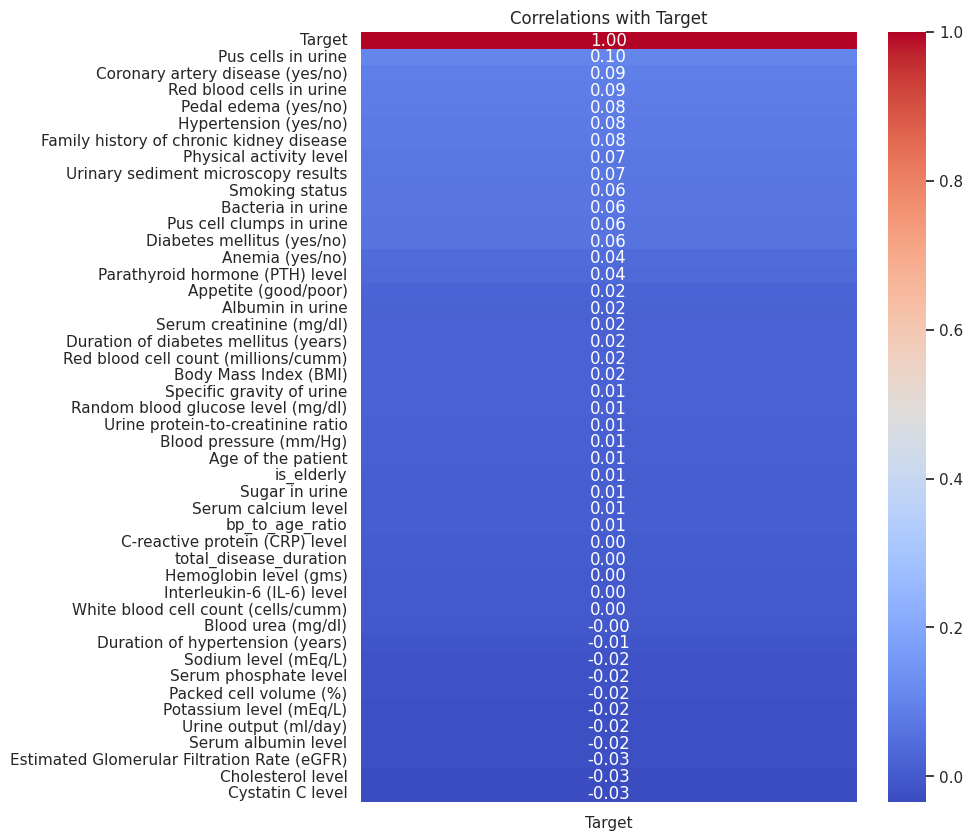

In [19]:
# prompt: give me the correlations between all columns and the Target column

# Calculate correlations with the 'Target' column
correlations = df_balanced.corr()['Target'].sort_values(ascending=False)

# Display the correlations
print("Correlations with the 'Target' column:")
print(correlations)

# Optional: Visualize the correlations using a heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(correlations.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlations with Target")
plt.show()

#Train-Test Splitting

In [20]:
# Prepare features & target
X = df_balanced.drop(columns=['Target'])
y = df_balanced['Target']

# Binarize y for ROC curve
y_bin = label_binarize(y, classes=[0, 1, 2, 3])
n_classes = y_bin.shape[1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Random Forest

In [21]:
# Train model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)
y_score = rf_model.predict_proba(X_test)

# Accuracy & report
print("✅ Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))

✅ Random Forest Accuracy: 0.9419425511197663

📊 Confusion Matrix:
 [[3195   24    8   93    0]
 [  17 2918   27  337    4]
 [   1   16 3247  120    0]
 [  40  189   24 2938    1]
 [   2    4    1   46 3180]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      3320
           1       0.93      0.88      0.90      3303
           2       0.98      0.96      0.97      3384
           3       0.83      0.92      0.87      3192
           4       1.00      0.98      0.99      3233

    accuracy                           0.94     16432
   macro avg       0.94      0.94      0.94     16432
weighted avg       0.94      0.94      0.94     16432



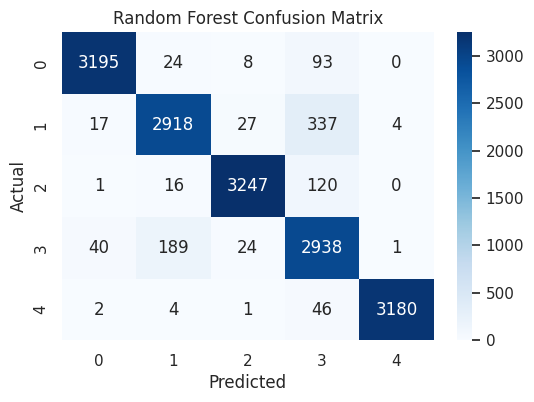

In [22]:

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

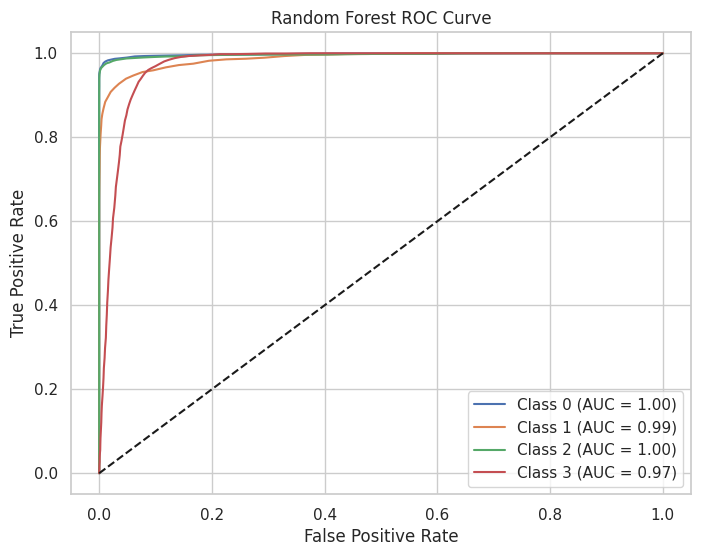

In [23]:
# Plot ROC Curve for each class
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")
plt.legend()
plt.show()

#XGboost


In [24]:
# Train
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred = xgb_model.predict(X_test)
y_score = xgb_model.predict_proba(X_test)

# Accuracy & report
print("✅ XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:43:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ XGBoost Accuracy: 0.8835199610516066

📊 Confusion Matrix:
 [[2936  100   99  107   78]
 [ 145 2438  220  353  147]
 [  56   94 3038  125   71]
 [  34  121   26 2993   18]
 [  15   26   37   42 3113]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90      3320
           1       0.88      0.74      0.80      3303
           2       0.89      0.90      0.89      3384
           3       0.83      0.94      0.88      3192
           4       0.91      0.96      0.93      3233

    accuracy                           0.88     16432
   macro avg       0.88      0.88      0.88     16432
weighted avg       0.88      0.88      0.88     16432



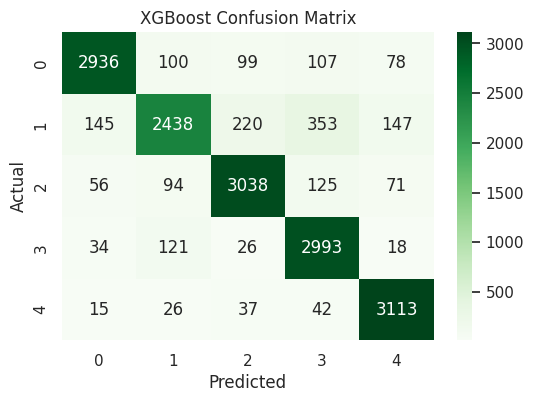

In [25]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

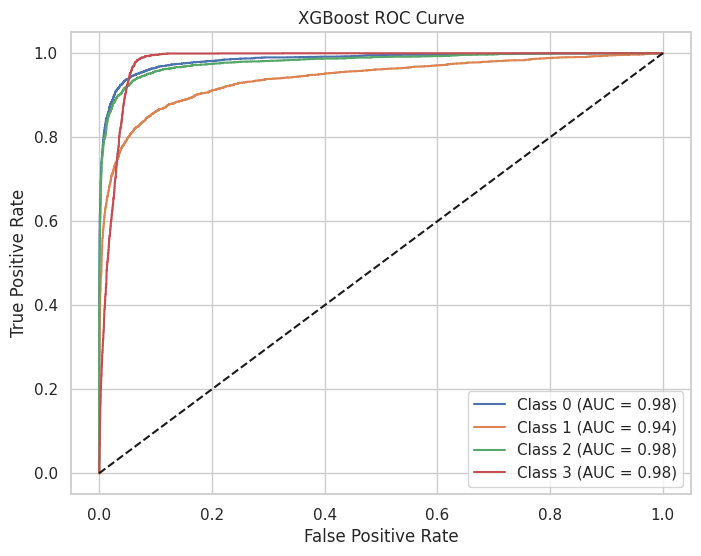

In [26]:

# ROC Curves
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost ROC Curve")
plt.legend()
plt.show()

#KNN

In [27]:
#Train KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

#Predict
y_pred = knn_model.predict(X_test)
y_score = knn_model.predict_proba(X_test)

#Evaluate
print("✅ KNN Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))


✅ KNN Accuracy: 0.8291139240506329

📊 Confusion Matrix:
 [[3217   36   31    8   28]
 [  54 3144   39   17   49]
 [  34   27 3285    8   30]
 [ 627  760  536  826  443]
 [  19   31   20   11 3152]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88      3320
           1       0.79      0.95      0.86      3303
           2       0.84      0.97      0.90      3384
           3       0.95      0.26      0.41      3192
           4       0.85      0.97      0.91      3233

    accuracy                           0.83     16432
   macro avg       0.85      0.83      0.79     16432
weighted avg       0.85      0.83      0.80     16432



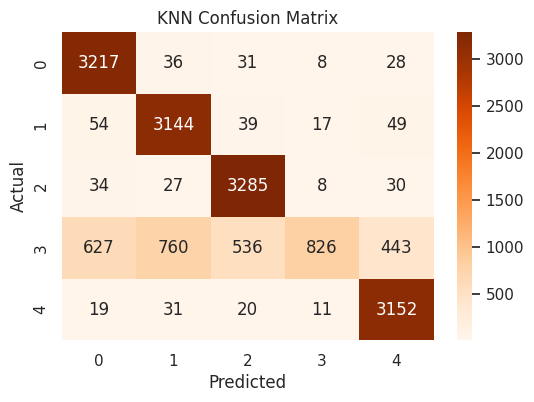

In [28]:
# 7. Confusion Matrix Plot
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Oranges')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

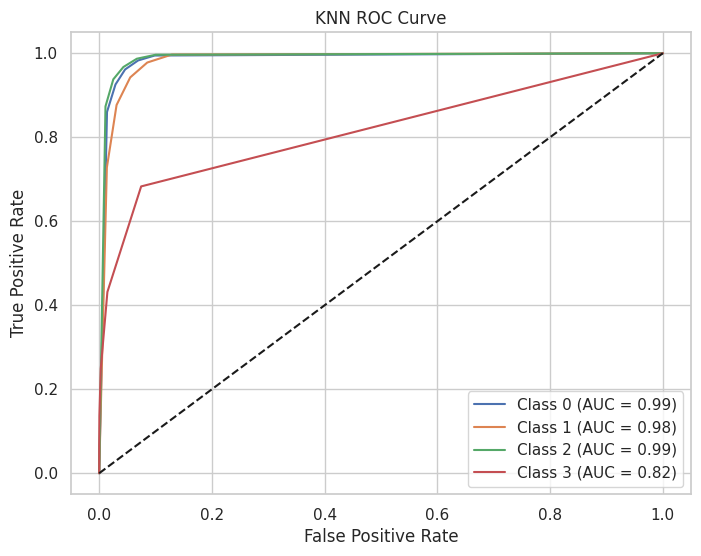

In [29]:
# 8. ROC Curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN ROC Curve")
plt.legend()
plt.show()


#Decision Tree

In [30]:
#Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

#Predict
y_pred = dt_model.predict(X_test)
y_score = dt_model.predict_proba(X_test)

#Evaluate performance
print("✅ Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))


✅ Decision Tree Accuracy: 0.7537731256085687

📊 Confusion Matrix:
 [[2757  193  128  167   75]
 [ 279 2136  268  459  161]
 [ 133  200 2771  190   90]
 [ 296  608  346 1751  191]
 [  42   89   46   85 2971]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81      3320
           1       0.66      0.65      0.65      3303
           2       0.78      0.82      0.80      3384
           3       0.66      0.55      0.60      3192
           4       0.85      0.92      0.88      3233

    accuracy                           0.75     16432
   macro avg       0.75      0.75      0.75     16432
weighted avg       0.75      0.75      0.75     16432



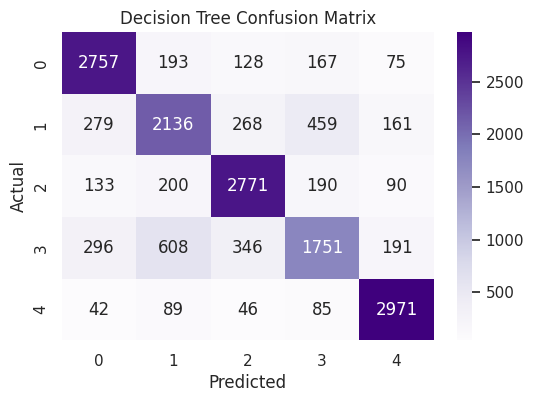

In [31]:
# 6. Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

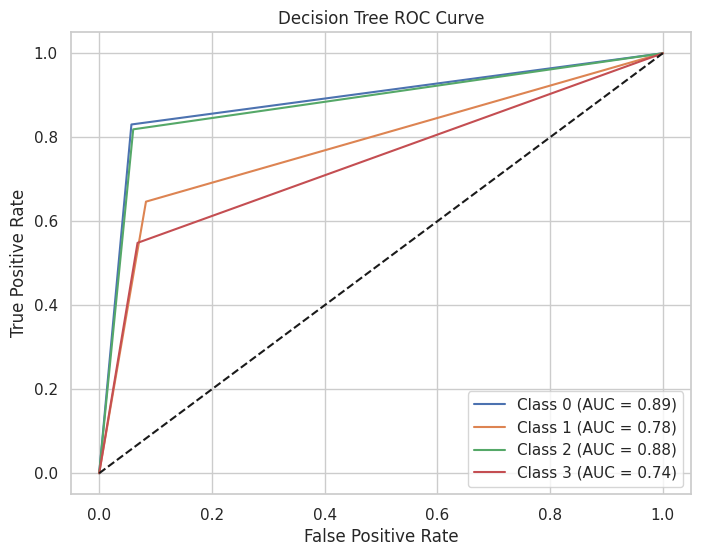

In [32]:
# 7. Plot ROC Curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree ROC Curve")
plt.legend()
plt.show()


#AdaBoost

In [33]:
#Train AdaBoost Model (fixed 'estimator' keyword)
ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    random_state=42
)
ada_model.fit(X_train, y_train)

#Predict and Probabilities
y_pred = ada_model.predict(X_test)
y_score = ada_model.predict_proba(X_test)

#Evaluation
print("✅ AdaBoost Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))



✅ AdaBoost Accuracy: 0.3442672833495618

📊 Confusion Matrix:
 [[1145  754  815  173  433]
 [ 960  749  726  352  516]
 [1039  674  954  168  549]
 [ 173  430  222 2207  160]
 [ 951  744  763  173  602]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.34      0.30      3320
           1       0.22      0.23      0.23      3303
           2       0.27      0.28      0.28      3384
           3       0.72      0.69      0.70      3192
           4       0.27      0.19      0.22      3233

    accuracy                           0.34     16432
   macro avg       0.35      0.35      0.35     16432
weighted avg       0.35      0.34      0.34     16432



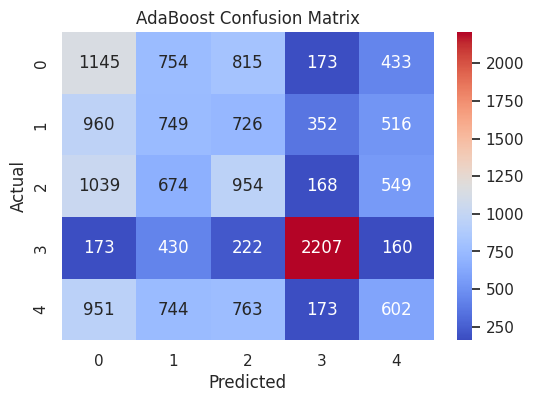

In [34]:
# 6. Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.title("AdaBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

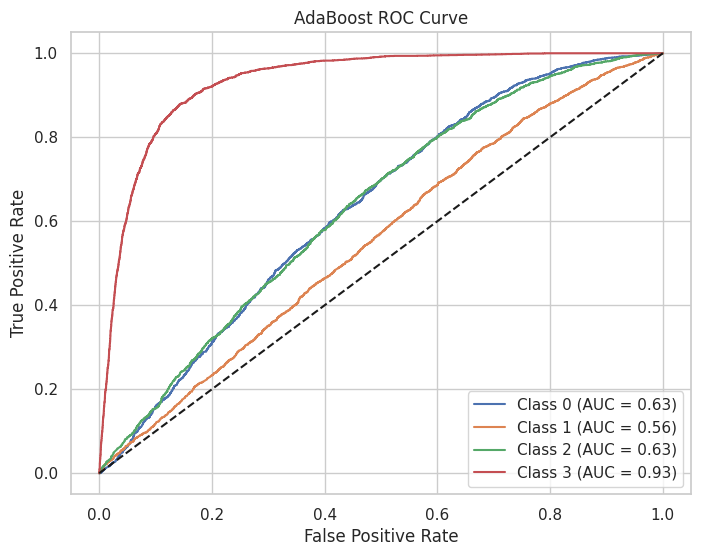

In [35]:
# 7. Plot ROC Curves (One vs All)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AdaBoost ROC Curve")
plt.legend()
plt.show()


#VotingClassifier

In [36]:

#Define base models
model1 = RandomForestClassifier(random_state=42)
model2 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model3 = KNeighborsClassifier(n_neighbors=5)
model4 = DecisionTreeClassifier(random_state=42)
model5 = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)

#Combine them in a VotingClassifier (soft voting because we want proba)
voting_model = VotingClassifier(
    estimators=[
        ('rf', model1),
        ('xgb', model2),
        ('knn', model3),
        ('dt', model4),
        ('ada', model5)
    ],
    voting='soft'  # soft = use predicted probabilities
)

#Train ensemble
voting_model.fit(X_train, y_train)

# 6. Predict
y_pred = voting_model.predict(X_test)
y_score = voting_model.predict_proba(X_test)

#Evaluate
print("✅ VotingClassifier Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))




/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:46:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ VotingClassifier Accuracy: 0.9231986368062317

📊 Confusion Matrix:
 [[3205   26   23   63    3]
 [  48 2939   57  229   30]
 [  10   19 3266   85    4]
 [ 123  337  106 2567   59]
 [   3    6    3   28 3193]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      3320
           1       0.88      0.89      0.89      3303
           2       0.95      0.97      0.96      3384
           3       0.86      0.80      0.83      3192
           4       0.97      0.99      0.98      3233

    accuracy                           0.92     16432
   macro avg       0.92      0.92      0.92     16432
weighted avg       0.92      0.92      0.92     16432



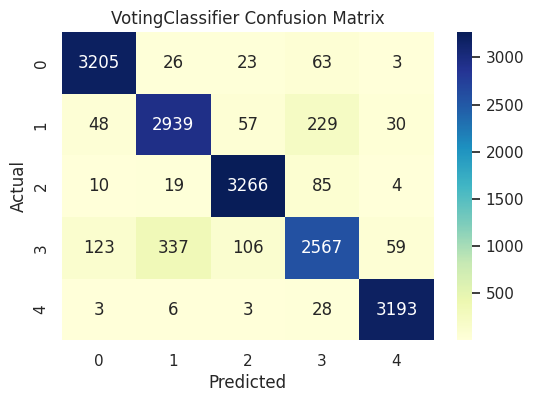

In [37]:
# 8. Confusion Matrix Plot
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.title("VotingClassifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


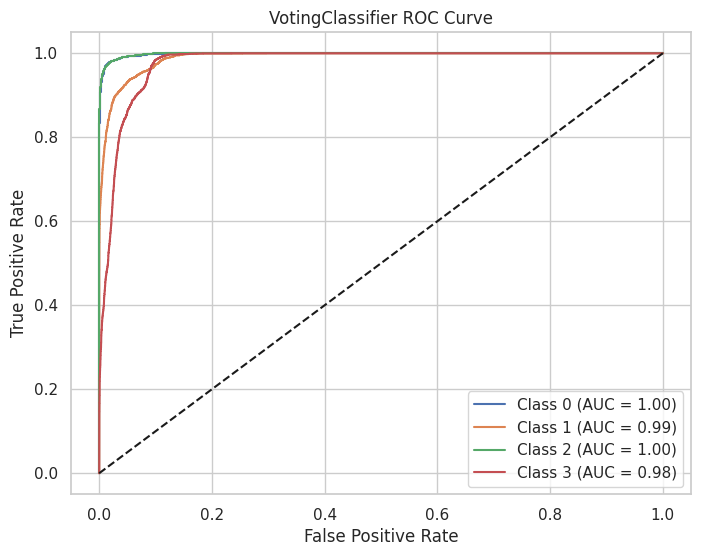

In [38]:
# 9. ROC Curves
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("VotingClassifier ROC Curve")
plt.legend()
plt.show()

#Results and Comparison

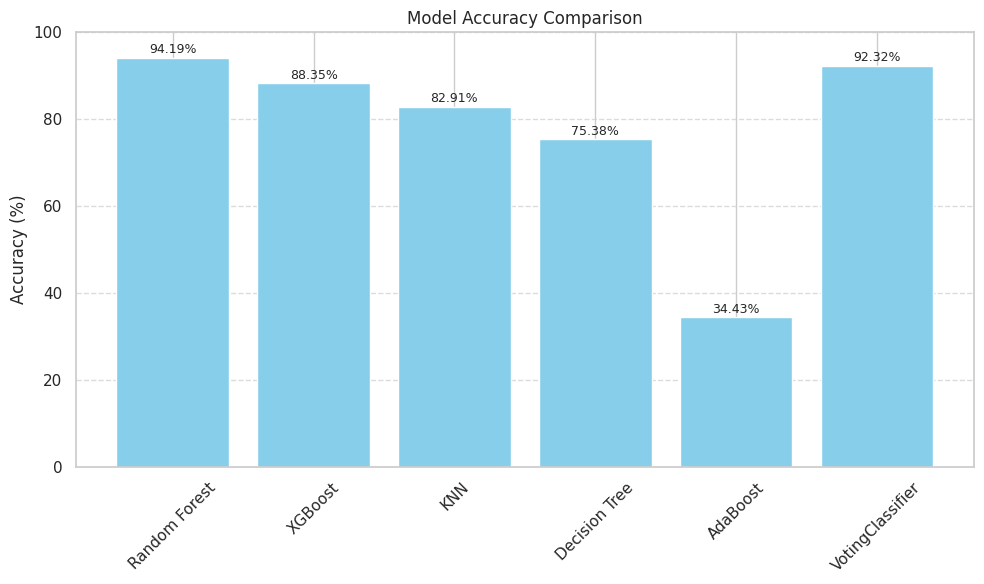

In [39]:
# Reinsert model accuracies after reset
model_accuracies = {
    "Random Forest":0.9419425511197663,
    "XGBoost":0.8835199610516066,
    "KNN":0.8291139240506329,
    "Decision Tree":0.7537731256085687,
    "AdaBoost":0.3442672833495618,
    "VotingClassifier":0.9231986368062317,

}

# Convert to percentages for plotting
models = list(model_accuracies.keys())
accuracies = [round(acc * 100, 2) for acc in model_accuracies.values()]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color='skyblue')
plt.ylim(0, 100)
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")

# Annotate bars with accuracy values
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f"{acc}%", ha='center', fontsize=9)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


AUC AND F1 SCORES


In [40]:
models = {
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'KNN': knn_model,
    'Decision Tree': dt_model,
    'AdaBoost': ada_model,
    'Voting Classifier': voting_model,

}
from sklearn.metrics import f1_score, roc_auc_score
# Dictionary to store results
results = []

for name, model in models.items():
    # Predict class labels
    y_pred = model.predict(X_test)

    # Predict probabilities — handle SVM separately (may not have predict_proba)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
        auc = roc_auc_score(y_test, y_prob, multi_class='ovr')  # for multiclass
    else:
        auc = 'N/A'  # Skip AUC if not supported

    # Calculate F1 score (macro for multiclass)
    f1 = f1_score(y_test, y_pred, average='macro')

    # Store results
    results.append({
        'Model': name,
        'F1 Score': round(f1, 4),
        'AUC': round(auc, 4) if auc != 'N/A' else 'N/A'
    })

# Display results in a DataFrame
df_results = pd.DataFrame(results)
print(df_results)


               Model  F1 Score     AUC
0      Random Forest    0.9423  0.9909
1            XGBoost    0.8822  0.9759
2                KNN    0.7925  0.9529
3      Decision Tree    0.7487  0.8456
4           AdaBoost    0.3457  0.6757
5  Voting Classifier    0.9218  0.9925


**Model Deployment**

In [41]:
# STEP 1: Import required libraries
from sklearn.preprocessing import StandardScaler
import joblib

# STEP 2: Fit a scaler (if not already done)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# STEP 3: Train the model on the scaled data (replace rf_model with your best model name)
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

# STEP 4: Save model and scaler to .pkl files
joblib.dump(rf_model, "kidney_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Files saved: kidney_model.pkl and scaler.pkl")


✅ Files saved: kidney_model.pkl and scaler.pkl


In [42]:
from google.colab import files
files.download("kidney_model.pkl")
files.download("scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
code = '''
import streamlit as st
import joblib
import numpy as np

# Load the saved model and scaler
model = joblib.load("kidney_model.pkl")
scaler = joblib.load("scaler.pkl")

st.title("🔬 Kidney Disease Prediction App")

# Input form
age = st.number_input("Age", 0, 120)
bp = st.number_input("Blood Pressure", 0, 200)
sg = st.number_input("Specific Gravity", 1.0, 1.030, step=0.001)
al = st.number_input("Albumin", 0, 5)
su = st.number_input("Sugar", 0, 5)
bgr = st.number_input("Blood Glucose Random", 0, 500)
bu = st.number_input("Blood Urea", 0, 200)
sc = st.number_input("Serum Creatinine", 0.0, 15.0, step=0.1)

if st.button("Predict"):
    user_data = np.array([[age, bp, sg, al, su, bgr, bu, sc]])
    user_scaled = scaler.transform(user_data)
    prediction = model.predict(user_scaled)[0]

    if prediction == 1:
        st.error("⚠️ High risk of kidney disease!")
    else:
        st.success("✅ Low risk of kidney disease.")
'''

with open("app.py", "w") as f:
    f.write(code)

print("✅ File created: app.py")


✅ File created: app.py


In [57]:
!ngrok config add-authtoken 2y6FfbGxFv8kxbgoql2Eb0raQC8_3JaXDjTYaE3T4ekHCNQio



Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [55]:
!pip install streamlit pyngrok --quiet


In [59]:
from pyngrok import ngrok
import os
import time

ngrok.kill()
os.system("streamlit run app.py &")
time.sleep(2)
public_url = ngrok.connect(8501)
print("🌐 Your Streamlit app is live at:\n", public_url)


🌐 Your Streamlit app is live at:
 NgrokTunnel: "https://5d62-34-134-57-254.ngrok-free.app" -> "http://localhost:8501"


In [51]:
!ls


app.py	kidney_disease_dataset.csv  kidney_model.pkl  sample_data  scaler.pkl


In [52]:
from google.colab import files
files.download("app.py")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
print(X_train.columns.tolist())


['Age of the patient', 'Blood pressure (mm/Hg)', 'Specific gravity of urine', 'Albumin in urine', 'Sugar in urine', 'Red blood cells in urine', 'Pus cells in urine', 'Pus cell clumps in urine', 'Bacteria in urine', 'Random blood glucose level (mg/dl)', 'Blood urea (mg/dl)', 'Serum creatinine (mg/dl)', 'Sodium level (mEq/L)', 'Potassium level (mEq/L)', 'Hemoglobin level (gms)', 'Packed cell volume (%)', 'White blood cell count (cells/cumm)', 'Red blood cell count (millions/cumm)', 'Hypertension (yes/no)', 'Diabetes mellitus (yes/no)', 'Coronary artery disease (yes/no)', 'Appetite (good/poor)', 'Pedal edema (yes/no)', 'Anemia (yes/no)', 'Estimated Glomerular Filtration Rate (eGFR)', 'Urine protein-to-creatinine ratio', 'Urine output (ml/day)', 'Serum albumin level', 'Cholesterol level', 'Parathyroid hormone (PTH) level', 'Serum calcium level', 'Serum phosphate level', 'Family history of chronic kidney disease', 'Smoking status', 'Body Mass Index (BMI)', 'Physical activity level', 'Durati